# Lab 3 Report
Qinchen lin

In [72]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from scipy.stats import poisson

# Problem 1

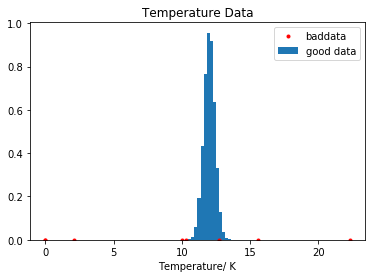

the upper threshhold is 13.2
the lower threshhold is 10.8
Truth Table


,True,False
Pos,0.99749,0.125
Neg,0.00251,0.875


In [129]:
# a

gooddata = stats.norm.rvs(12, 0.4, 100000)
baddata = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
baddata = np.asarray(baddata)
data = np.concatenate((gooddata, baddata))
fig, ax = plt.subplots(1,1)
ax.hist(data, 100, density = 'true', label = 'good data' )
ax.plot(baddata, np.linspace(0,0,8) , '.',color ='r', label = 'baddata')
plt.title("Temperature Data")
plt.xlabel('Temperature/ K')
plt.legend()
plt.show()
# By ploting the data, we can tell that most of the bad data falls out of 3 standard deviation away from the mean
# so it's reasonable to choose 3 sigma significance to determin the threshhold. It should be noted that in this case 
# we already know what's the bad data, which is not likely to be the general case in the real world. But the 3 sigma
# value is still a reasonable value 

# Statistical question: If my data follows the normal distribution with mean to be 12 and sd to be 0.4, what's the 
# temperature threshold to determine wether a data is good or bad if I chose the data that falls outside of 
# 3 sigma to be bad data

# I chose this statisitical question because I need to find my threshold for determining a good/bad data

# Math question: Do the integral on the standard normal distribution to get the probability from negative infinity
# to -3 (call it p_lower) and from 3 to possitive infinity (call it p_upper). Then do the integral on the 
# normal distribution (mean value to be 12 and the sd to be 0.4) from negative infinity to some threshhold that 
# gives the same probability as p_lower. Then repeat the process but from possitive infinity to some threshold
# that will gives the same probability as p_upper. What's the value of two threshholds

threshhold_upper = stats.norm.ppf(stats.norm.cdf(3), 12, 0.4)
threshhold_lower = 12 - (threshhold_upper - 12)
print('the upper threshhold is', threshhold_upper)
print('the lower threshhold is',threshhold_lower)

data_discarded = len(data[data > 13.2]) + len(data[data < 10.8])
data_accepted = len(data) - data_discarded 
baddata_discarded = len(baddata[baddata > 13.2]) +len(baddata[baddata < 10.8])
baddata_accepted = len(baddata) - baddata_discarded
                        
p_truePos = (data_accepted - baddata_accepted) / len(gooddata)
p_falseNeg = baddata_discarded / len(baddata)
p_trueNeg = 1 - p_truePos
p_falsePos = 1 - p_falseNeg

truefalse = {'True':[p_truePos, p_trueNeg], 'False':[p_falsePos, p_falseNeg]}
print('Truth Table')
table = pd.DataFrame(truefalse, index = ['Pos','Neg'])
table


# Discussion
As I changed the statistical threshhold to be smaller (such as 2 sigma), more good data were thrown. It is predictable quantity in this case because the number of good data (100k) is way larger than the number of bad data (8), and the good data follows normal distribution. If the weight of the good data and the bad data become more even, the quantity will be less predictable.

Yes, the bad data still comes in when I chose smaller threshhold (2 sigma), becasue one of the bad data 12.7 is within 2 standard diviations. It is avoidable in this case but it will be some trade off. To be specifically, I could choose 1 sigma to be my threshhold in order to filter out 12.7. But if i do so, more good data will be thrown. In general, the closer that bad data values are to the mean value, the higher price it will be to filter out those bad data.

# Problem 2

# Discussion
It's given that the result distribution is 2D normal distribution, and the distance between two point follows the fomular of d = sqrt(x^2 + y^2). So we can use the Rayleigh distribution to make the detection of movement since
the Rayleigh distribution can be in the form of R = sqrt(X^2 + Y^2) if X and Y are both normal distribution with the same mean and standard
deviation. For this problem specificlly, X and Y are two standard normal distributions. So I would use a Rayleigh distribution with the standard deviation of 1. It will be referred to as distance Rayleigh distribution latter. 

Becuase the goal is to detect wether a movement is a true movement, so the greater the distance is, the more likely that it's a true movement. With that being said, only the lower threhhold is needed for this detection. And here I use 5 sigma to find my lower threshhold.

Question in word: Assuming my background distribution is a Rayleigh Distribution with the standard diviation of 1 arcsecond. And the greater the value is, the more likely that it's a true movment. What's the minimum distance that we can claim the true movement if we use the 5 sigma significance.   

Question in math: First integrate the standard normal distribution from 5 sigma to positive infinity to get the probability. Then integrate the distance Rayleigh distribution from positive infinity to some value that gives 
the same probability. What's that value?

# Problem 3

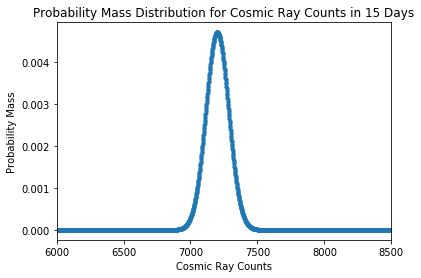

The moon shadow detection has a significance of -4.750747965777188 sigma


In [113]:
# Because the moon blocks cosmic rays, so the less ray counts is more signal like

# The background distribution is Poisson distribution
# Because the convolution of Poisson distributions is also a Poisson distribution. So the probability mass
# distribution for 15 days will just be the Poisson distribution with the mean of 1 * 60 * 8 * 15 = 7200

# statistical quesiton : Assuming my background data distribution is a Poisson Distribution with 
# the average rate to be 7200 counts. What's the probability (in sigma) that I will have a measurement of 
# 6800 counts or less.

# question in math: Integrate the background Poisson distribution from the negative infinity to 6800 to get 
# the probability. Then integrate the standard normal distribution from the negative infinity to the sigma value
# that gives the same probability. What's the sigma value here?

AverageRate = 7200
counts = np.linspace(0, 10000, 10001)
p_cosmicrays = poisson.pmf(counts, AverageRate)  
fig1 = plt.figure(1)
plt.plot(counts, p_cosmicrays,'.')
plt.xlim(6000, 8500)
plt.title('Probability Mass Distribution for Cosmic Ray Counts in 15 Days')
plt.xlabel('Cosmic Ray Counts')
plt.ylabel('Probability Mass')
plt.show()

p_lessThan6800 = poisson.cdf(6800, 7200)
sigma = stats.norm.ppf(p_lessThan6800)
print('The moon shadow detection has a significance of', sigma, 'sigma')